### KMeans [실습]

In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# wholesale customers dataset

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

sample_df = pd.read_csv(uci_path)
sample_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
sample_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
# 분석에 사용할 피처를 카피

copy_df = sample_df
copy_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
# 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
copy_scaler = scaler.fit_transform(copy_df)
copy_scaler


array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [21]:
# 군집모형 학습 및 예측
# 예측결과를 데이터 프레임에 추가

sample_kmeans = KMeans(n_clusters=6, random_state=0,
                    init = 'k-means++', max_iter = 300)
sample_kmeans.fit(copy_scaler)
sample_kmeans.predict(copy_scaler)

array([3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0,
       5, 1, 3, 3, 0, 0, 3, 5, 0, 0, 0, 5, 0, 3, 5, 3, 3, 5, 5, 0, 3, 3,
       3, 3, 3, 1, 3, 3, 0, 0, 5, 3, 0, 0, 1, 3, 0, 0, 3, 1, 3, 3, 0, 1,
       0, 3, 0, 0, 5, 5, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 1, 1, 5,
       0, 0, 0, 0, 1, 5, 3, 0, 3, 0, 0, 0, 3, 3, 3, 5, 0, 0, 3, 3, 3, 3,
       0, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 5, 0, 3, 0, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       5, 0, 0, 0, 0, 5, 0, 4, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 5, 3,
       2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2,
       3, 2, 3, 2, 3, 2, 2, 2, 2, 5, 0, 0, 5, 5, 0, 3, 0, 3, 5, 5, 5, 5,
       0, 0, 0, 5, 0, 0, 0, 3, 2, 3, 2, 3, 3, 2, 3,

In [23]:
copy_df['cluster_id'] = sample_kmeans.labels_
copy_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,3


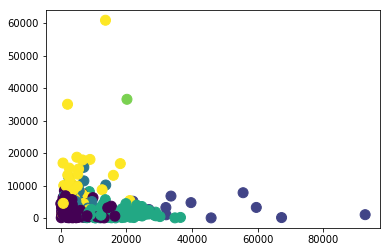

In [34]:

plt.scatter(x = copy_df['Grocery'], y = copy_df['Frozen'], 
            c = copy_df['cluster_id'], 
            s = 100)
plt.show()



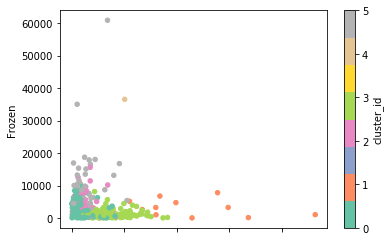

In [41]:
copy_df.plot(kind='scatter', x = 'Grocery', y = 'Frozen', c = 'cluster_id', colorbar = True, cmap = 'Set2')
plt.show()

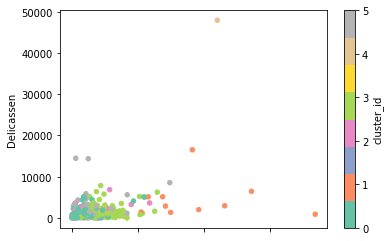

In [42]:
copy_df.plot(kind='scatter', x = 'Milk', y = 'Delicassen', c = 'cluster_id', colorbar = True, cmap = 'Set2')
plt.show()

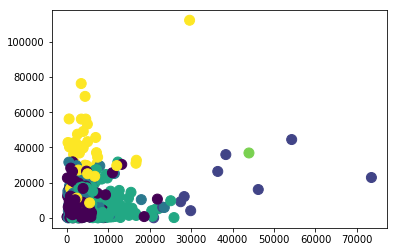

In [33]:

plt.scatter(x = copy_df['Milk'], y = copy_df['Fresh'], 
            c = copy_df['cluster_id'], 
            s = 100)
plt.show()

In [43]:
# PCA 차원축소 피처값 2개
# 군집화 시각화 진행

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components =2)

pca_transform = pca.fit_transform(copy_df.iloc[:, :-1])


In [58]:
copy_df['pca_x'] = pca_transform[:, 0]
copy_df['pca_y'] = pca_transform[:, 1]
copy_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id,pca_x,pca_y
0,2,3,12669,9656,7561,214,2674,1338,3,650.022120,1585.519107
1,2,3,7057,9810,9568,1762,3293,1776,3,-4426.804984,4042.451521
2,2,3,6353,8808,7684,2405,3516,7844,3,-4841.998710,2578.762188
3,1,3,13265,1196,4221,6404,507,1788,0,990.346444,-6279.806002
4,2,3,22615,5410,7198,3915,1777,5185,3,10657.998731,-2159.725789


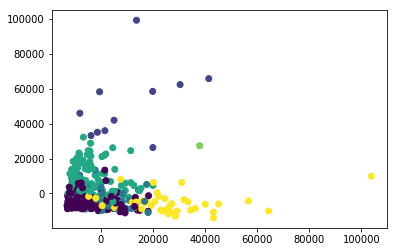

In [60]:
plt.scatter(x = copy_df['pca_x'], y = copy_df['pca_y'], c = copy_df['cluster_id'])
plt.show()